# Visualize zones in Metropolitan France where there are no UAS geographical zones (yet)

In [1]:
%load_ext lab_black

In [2]:
from shapely.geometry import Polygon, Point, MultiPolygon
import shapely
import pandas as pd
from geopandas import GeoDataFrame
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

### Load Metropolitan France airspace data

<AxesSubplot:>

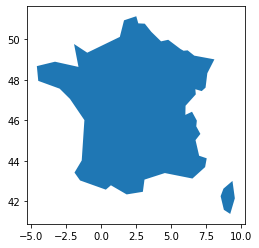

In [3]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
france = world.query("continent == 'Europe'").query("name == 'France'")
france["geometry"] = france["geometry"].apply(
    lambda mp: MultiPolygon([p for p in mp.geoms if p.bounds[1] > 20])
)
france.plot()

### Load UAS geographical zones

In [4]:
uas_zones = gpd.read_file("uas_zones.geojson")
uas_zones.head()

,name,lowerLimit,lowerVerticalReference,upperLimit,upperVerticalReference,otherReasonInfo,reason,geometry
0,[LF][D 5],5491.34,AMSL,8697.88,AMSL,Zone dangereuse,OTHER,"POLYGON ((-4.60639 49.53806, -5.50000 49.36139..."
1,[LF][D 7],5491.34,AMSL,8697.88,AMSL,Zone dangereuse,OTHER,"POLYGON ((-4.30500 48.96944, -5.05028 48.75056..."
2,[LF][D 12 GLOBALE A],5491.34,AMSL,8697.88,AMSL,Zone dangereuse,OTHER,"POLYGON ((-5.96667 48.80917, -6.86139 48.40917..."
3,[LF][D 12 GLOBALE B],7929.77,AMSL,30765.67,AMSL,Zone dangereuse,OTHER,"POLYGON ((-5.96667 48.80917, -6.86139 48.40917..."
4,[LF][D 12 NORD A],5491.34,AMSL,8697.88,AMSL,Zone dangereuse,OTHER,"POLYGON ((-5.96667 48.80917, -6.86139 48.40917..."


### Difference between zones (in EPSG:4326)

In [5]:
diff = france.overlay(uas_zones, how="difference")

D:\tdubot\anaconda3\envs\env2\lib\site-packages\geopandas\geodataframe.py:2196: UserWarning: `keep_geom_type=True` in overlay resulted in 248 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


<AxesSubplot:>

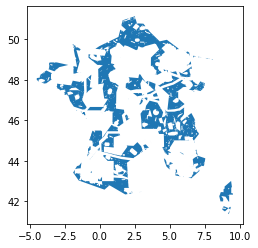

In [6]:
diff.plot()

### Visualize diff on France map

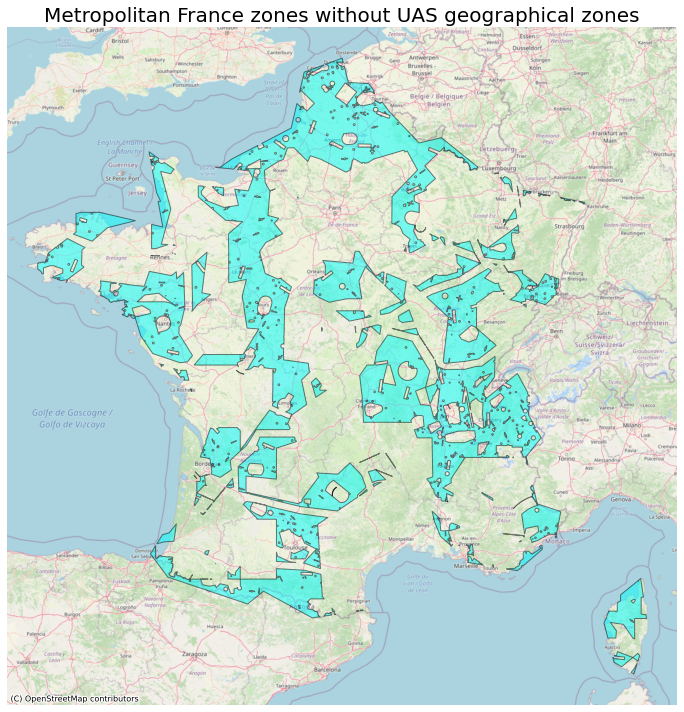

In [7]:
f, ax = plt.subplots(figsize=(10, 10))

diff.to_crs(epsg=3857).plot(
    ax=ax,
    color="cyan",
    linewidth=1.0,
    edgecolor="black",
    alpha=0.5,
    legend_kwds={"loc": 1, "fontsize": 7},
)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, alpha=1.0)
ax.axis("off")
ax.set_title("Metropolitan France zones without UAS geographical zones", fontsize=20)
plt.tight_layout()
plt.savefig("without_france.png", dpi=150, bbox_inches="tight")

### Interactive map

In [8]:
m = diff.explore(
    color="cyan",
    style_kwds={"color": "black", "fillOpacity": 0.4, "weight": 0.8},
    tooltip=False,
)
m.save("without.html")
m